In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)  
pd.set_option('display.width', 1000)

### Visualisation générale

In [37]:
samples = pd.read_excel('../data/samples.xlsx', sheet_name=None)

colonnes_a_supprimer = [
    'id_client', 'CRTOC_AG_MVTAFF_IND_0010', 'CRTOC_IND_0010', 'CRTOC_IND_0164',
    'CRTOD_CMT_PRO_IND_0209', 'CRTOP_AG_IND_0038', 'CRTOP_IND_0038', 
    'CRTOU_CCT_PRO_IND_0209', 'DATCREENT', 'DATRLNORG', 'INDPARDCD', 
    'RATIO1', 'RATIO3', 'TOP_PRO_ACTIF', 'IND_ACTIF', 'IND_PER_PM', 
    'CODCMNIEE', 'CODPAY_NAISSANCE', 'CODPAY_NATIONALITE', 'CODPAY_RESIDENCE', 
    'CODSEXPRS', 'secteur_activite', 'secteur_activite_bis', 'CODTYPPRS'
]

samples = samples
train = samples[list(samples.keys())[0]]
train = train.drop(columns=colonnes_a_supprimer)
test = samples[list(samples.keys())[1]]
test = test.drop(columns=colonnes_a_supprimer)
oot = samples[list(samples.keys())[2]] 
oot = oot.drop(columns=colonnes_a_supprimer)  
sample = pd.concat([train, test, oot], ignore_index=True)

In [38]:
print(sample.shape)
print(sample.dtypes)
sample.describe()

(26233, 43)
DDefaut_NDB                             int64
datdelhis                               int64
AGEPRS                                  int64
ANCIENNETE                              int64
CODETAJUR                               int64
CODITDBDF_PRO                           int64
CODNAF2                                object
CRTAD_AG_MVTAFF_IND_0010                int64
CRTAD_AG_NBECR_A                        int64
CRTAD_AG_NBECR_B                        int64
CRTAD_AG_NBJDE_BA                       int64
CRTAD_AG_NBJDE_BB                       int64
CRTAD_AG_NBJDE_BC                       int64
CRTAD_AG_SOLDE_IND_0009                 int64
CRTAD_AG_SOLDE_T                        int64
CRTAD_AG_SOLDE_T1                       int64
CRTAD_AG_SOLDE_T2                       int64
CRTAD_AG_SOLDE_T3                       int64
CRTAD_AG_SOLDE_T4                       int64
CRTAD_IND_0015                          int64
CRTAD_IND_0038                          int64
CRTAD_IND_0062        

,DDefaut_NDB,datdelhis,AGEPRS,ANCIENNETE,CODETAJUR,CODITDBDF_PRO,CRTAD_AG_MVTAFF_IND_0010,CRTAD_AG_NBECR_A,CRTAD_AG_NBECR_B,CRTAD_AG_NBJDE_BA,CRTAD_AG_NBJDE_BB,CRTAD_AG_NBJDE_BC,CRTAD_AG_SOLDE_IND_0009,CRTAD_AG_SOLDE_T,CRTAD_AG_SOLDE_T1,CRTAD_AG_SOLDE_T2,CRTAD_AG_SOLDE_T3,CRTAD_AG_SOLDE_T4,CRTAD_IND_0015,CRTAD_IND_0038,CRTAD_IND_0062,CRTAD_IND_0205,CRTAE_AG_SLDEPA,CRTAR_IND_0036,CRTOC_AG_LIGCRE_2T_IND_0009,CRTOC_AG_LIGCRE_IND_0009,CRTOC_AG_LIGDEB_2T_IND_0015,CRTOC_AG_LIGDEB_IND_0015,CRTOC_AG_MVTAFF_2T_IND_0010,CRTOC_AG_NBJCRE_2T_IND_0009,CRTOC_AG_NBJDEB_2T_IND_0015,CRTOC_AG_NBJDEB_IND_0015,CRTOC_IND_0015,CRTOC_IND_0301,CRTOC_MOY_MVTAFF_IND_0010,CRTOC_SLD_MOY,CRTOD_CMT_IND_0036,MINSOLDE_PAR,NBECR_PAR,CRTAD_IND_0042,CODACVPRO,DATCREPRSENT
count,26233.000000,26233.000000,26233.000000,26233.000000,26233.000000,26233.000000,2.623300e+04,26233.000000,26233.000000,26233.000000,26233.000000,26233.000000,2.623300e+04,2.623300e+04,2.623300e+04,2.623300e+04,2.623300e+04,2.623300e+04,26233.000000,2.623300e+04,2.623300e+04,2.623300e+04,2.623300e+04,2.623300e+04,2.623300e+04,2.623300e+04,2.623300e+04,2.623300e+04,2.623300e+04,26233.000000,26233.000000,26233.000000,26233.000000,26233.000000,2.623300e+04,2.623300e+04,2.623300e+04,2.623300e+04,26233.000000,26233.000000,26233.000000,19476
mean,0.060001,202304.516792,12.859566,140.544162,4618.911829,0.012427,4.867374e+05,27.836466,26.644379,23.051729,4.703160,4.501353,4.326886e+05,3.225908e+05,3.363672e+05,3.462446e+05,3.475285e+05,3.211737e+05,1.566043,4.106659e+05,2.305531e+03,1.983490e+05,4.949561e+05,7.647718e+04,1.159902e+09,1.956872e+08,-1.811834e+07,-2.756064e+06,8.692520e+06,166.297717,16.986696,8.691267,2.968742,3.368582,2.660246e+06,6.295176e+06,1.669282e+06,1.754465e+05,-0.380208,9.399802,854.826059,2012-09-18 10:14:20.628465920
min,0.000000,202301.000000,0.000000,0.000000,1100.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.375800e+07,-2.240933e+07,-2.550667e+07,-1.509000e+07,-5.788833e+06,0.000000,-1.780000e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.091196e+11,-1.510892e+10,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-2.194045e+08,0.000000e+00,-2.550667e+07,-562.000000,0.000000,0.000000,1900-01-01 00:00:00
25%,0.000000,202303.000000,0.000000,40.000000,1990.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.043699e+07,5.946610e+06,-4.500000e+03,-1.158300e+04,3.000000e+05,173.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.557510e+05,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2008-10-21 18:00:00
50%,0.000000,202305.000000,0.000000,94.000000,5499.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.352389e+08,4.161053e+07,0.000000e+00,0.000000e+00,2.130540e+06,182.000000,0.000000,0.000000,0.000000,0.000000,4.950000e+05,1.304663e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2015-12-09 00:00:00
75%,0.000000,202307.000000,25.000000,197.000000,5710.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.010128e+09,1.710486e+08,0.000000e+00,0.000000e+00,6.347500e+06,184.000000,1.000000,0.000000,0.000000,0.000000,1.951827e+06,5.567296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,2168.000000,2019-12-04 06:00:00
max,1.000000,202308.000000,95.000000,883.000000,9900.000000,2.000000,5.951200e+09,839.000000,896.000000,1016.000000,236.000000,232.000000,7.769740e+08,2.668670e+08,2.523410e+08,2.415587e+08,3.743125e+08,3.335600e+08,86.000000,7.7

### Etudes des valeurs manquantes

In [39]:
missing_values = sample.isnull().sum()
missing_values

DDefaut_NDB                       0
datdelhis                         0
AGEPRS                            0
ANCIENNETE                        0
CODETAJUR                         0
CODITDBDF_PRO                     0
CODNAF2                           0
CRTAD_AG_MVTAFF_IND_0010          0
CRTAD_AG_NBECR_A                  0
CRTAD_AG_NBECR_B                  0
CRTAD_AG_NBJDE_BA                 0
CRTAD_AG_NBJDE_BB                 0
CRTAD_AG_NBJDE_BC                 0
CRTAD_AG_SOLDE_IND_0009           0
CRTAD_AG_SOLDE_T                  0
CRTAD_AG_SOLDE_T1                 0
CRTAD_AG_SOLDE_T2                 0
CRTAD_AG_SOLDE_T3                 0
CRTAD_AG_SOLDE_T4                 0
CRTAD_IND_0015                    0
CRTAD_IND_0038                    0
CRTAD_IND_0062                    0
CRTAD_IND_0205                    0
CRTAE_AG_SLDEPA                   0
CRTAR_IND_0036                    0
CRTOC_AG_LIGCRE_2T_IND_0009       0
CRTOC_AG_LIGCRE_IND_0009          0
CRTOC_AG_LIGDEB_2T_IND_0015 

In [40]:
print(sample['DATCREPRSENT'].head())
print(sample['DATCREPRSENT'].describe())
print(sample['DATCREPRSENT'].isnull().mean())

0   2002-06-01
1   2021-09-01
2   2021-01-04
3   2016-03-25
4   2019-09-17
Name: DATCREPRSENT, dtype: datetime64[ns]
count                            19476
mean     2012-09-18 10:14:20.628465920
min                1900-01-01 00:00:00
25%                2008-10-21 18:00:00
50%                2015-12-09 00:00:00
75%                2019-12-04 06:00:00
max                2023-08-31 00:00:00
Name: DATCREPRSENT, dtype: object
0.2575763351503831


25,76 % de valeurs manquantes. Par la suite on regroupera par période et on créera une autre modalité pour les valeurs manquantes.

### datdelhis

In [41]:
print(sample['datdelhis'].unique())
sample['datdelhis'] = sample['datdelhis'] % 100
print(sample['datdelhis'].unique())
sample['datdelhis'] = sample['datdelhis'].astype(str)

[202305 202301 202303 202302 202306 202304 202307 202308]
[5 1 3 2 6 4 7 8]


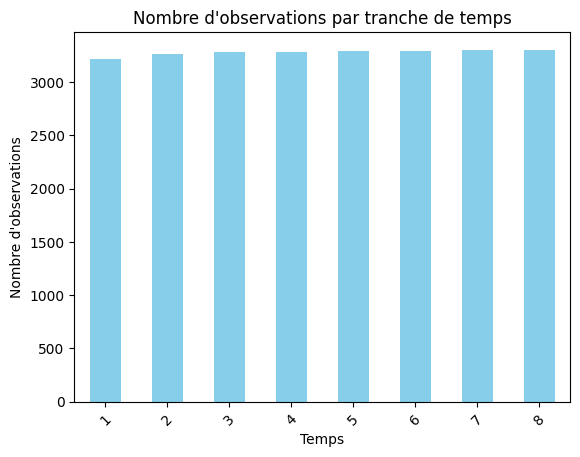

In [42]:
observations_par_tranche = sample.groupby('datdelhis').size()
observations_par_tranche.plot(kind='bar', color='skyblue')
plt.title("Nombre d'observations par tranche de temps")
plt.xlabel("Temps")
plt.ylabel("Nombre d'observations")
plt.xticks(rotation=45)
plt.show()


### AGEPRS

(array([1.9635e+04, 3.0000e+00, 2.2900e+02, 9.5400e+02, 1.5100e+03,
        1.5110e+03, 1.5220e+03, 6.7700e+02, 1.6900e+02, 2.3000e+01]),
 array([ 0. ,  9.5, 19. , 28.5, 38. , 47.5, 57. , 66.5, 76. , 85.5, 95. ]),
 <BarContainer object of 10 artists>)

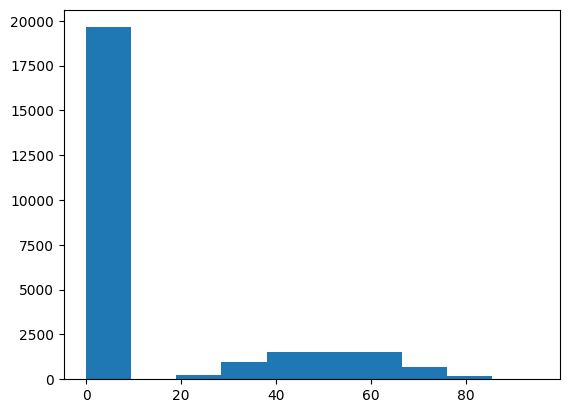

In [43]:
plt.hist(sample['AGEPRS'])

(array([  56.,  617., 1078., 1095., 1361., 1259.,  708.,  344.,   74.,
           6.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <BarContainer object of 10 artists>)

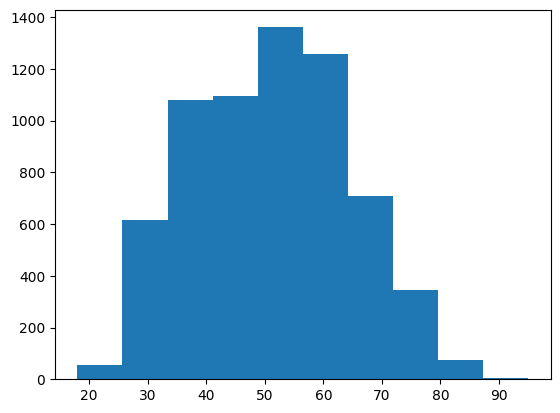

In [44]:
plt.hist(sample[sample['AGEPRS'] != 0]['AGEPRS'])

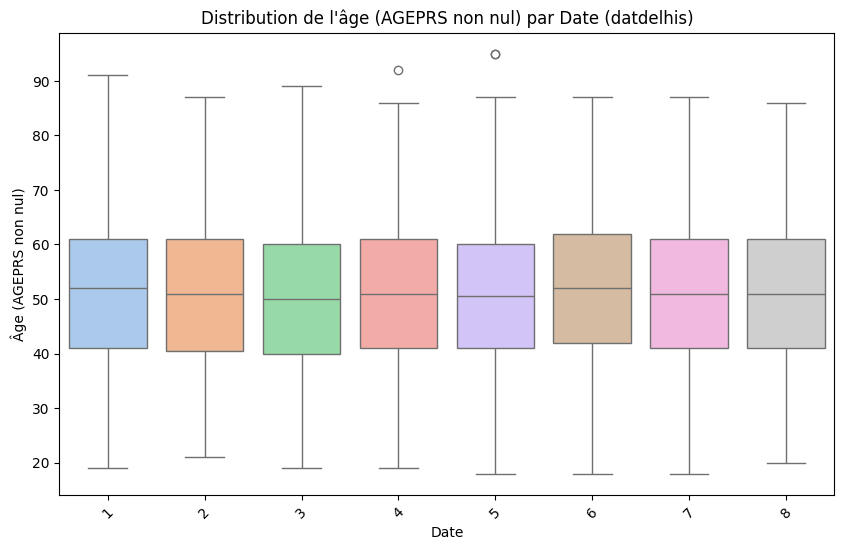

In [45]:
df = sample[sample['AGEPRS'] != 0]
df = df.sort_values('datdelhis')

# Créer un boxplot pour visualiser la distribution de AGEPRS par date
plt.figure(figsize=(10, 6))
sns.boxplot(x='datdelhis', y='AGEPRS', data=df, palette='pastel')

# Ajouter des titres et des labels
plt.title('Distribution de l\'âge (AGEPRS non nul) par Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('Âge (AGEPRS non nul)')
plt.xticks(rotation=45)  # Incliner les étiquettes des dates si nécessaire
plt.show()

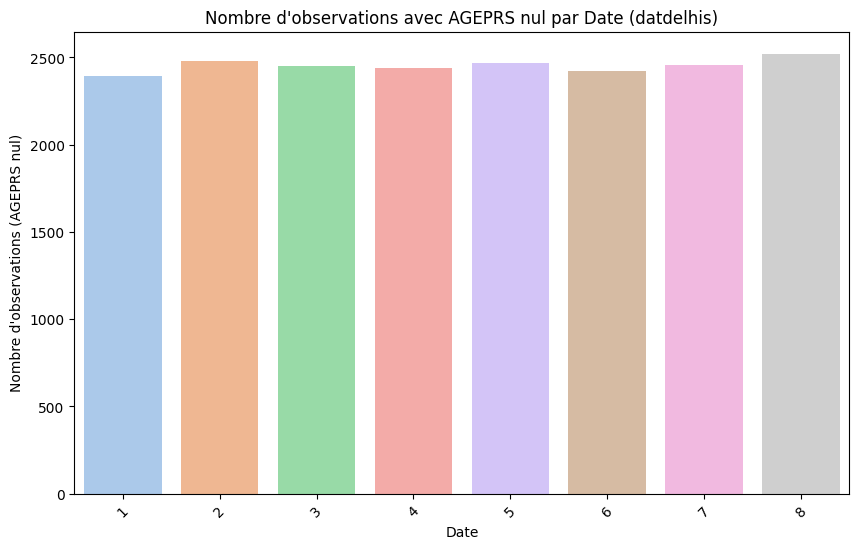

In [46]:
# Filtrer les âges égaux à 0
df = sample[sample['AGEPRS'] == 0]
df = df.sort_values('datdelhis')

# Compter le nombre d'observations par date
observations_par_date = df.groupby('datdelhis').size().reset_index(name='Nombre d\'observations')

# Créer un graphique à barres pour le nombre d'observations par date
plt.figure(figsize=(10, 6))
sns.barplot(x='datdelhis', y='Nombre d\'observations', data=observations_par_date, palette='pastel')

# Ajouter des titres et des labels
plt.title('Nombre d\'observations avec AGEPRS nul par Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('Nombre d\'observations (AGEPRS nul)')
plt.xticks(rotation=45)  # Incliner les étiquettes des dates pour plus de lisibilité
plt.show()

### ANCIENNETE

(array([1.2592e+04, 6.1940e+03, 3.0200e+03, 1.7160e+03, 1.4770e+03,
        8.6000e+02, 3.0000e+02, 4.6000e+01, 7.0000e+00, 2.1000e+01]),
 array([  0. ,  88.3, 176.6, 264.9, 353.2, 441.5, 529.8, 618.1, 706.4,
        794.7, 883. ]),
 <BarContainer object of 10 artists>)

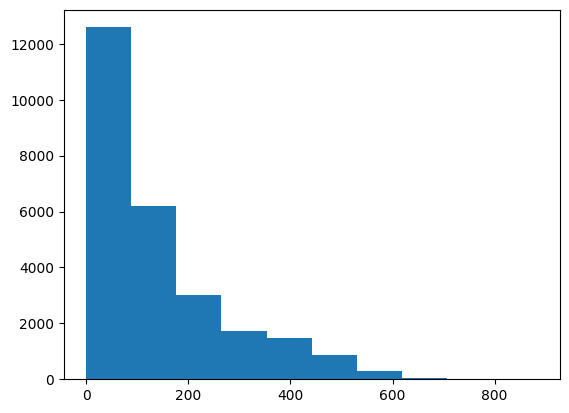

In [47]:
plt.hist(sample['ANCIENNETE'])

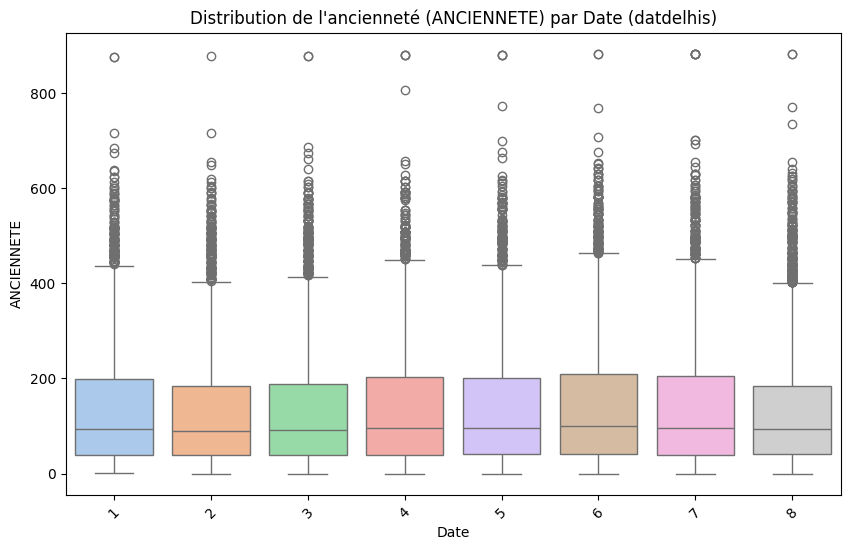

In [48]:
df = sample
df = df.sort_values('datdelhis')

# Créer un boxplot pour visualiser la distribution de ANCIENNETE par date
plt.figure(figsize=(10, 6))
sns.boxplot(x='datdelhis', y='ANCIENNETE', data=df, palette='pastel')

# Ajouter des titres et des labels
plt.title('Distribution de l\'ancienneté (ANCIENNETE) par Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('ANCIENNETE')
plt.xticks(rotation=45)  # Incliner les étiquettes des dates si nécessaire
plt.show()

### CRTOD_CMT_IND_0036 (montant des encours)

(array([4.591e+03, 5.100e+01, 2.000e+01, 1.200e+01, 7.000e+00, 1.000e+01,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([1.01522000e+05, 6.19122273e+07, 1.23722933e+08, 1.85533638e+08,
        2.47344343e+08, 3.09155048e+08, 3.70965754e+08, 4.32776459e+08,
        4.94587164e+08, 5.56397870e+08, 6.18208575e+08]),
 <BarContainer object of 10 artists>)

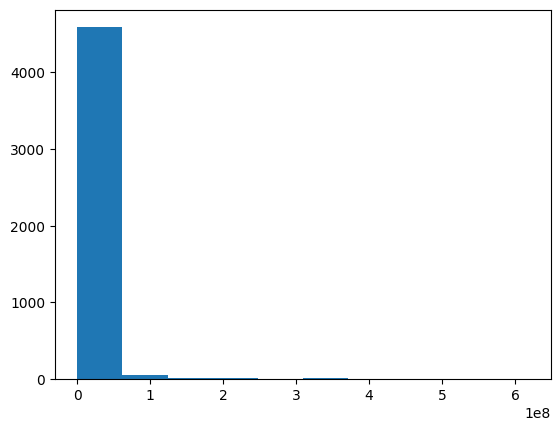

In [49]:
plt.hist(sample[sample['CRTOD_CMT_IND_0036'] >= 100000]['CRTOD_CMT_IND_0036'])

(array([21., 14.,  6.,  5.,  9.,  2.,  0.,  0.,  0.,  2.]),
 array([1.06296928e+08, 1.57488093e+08, 2.08679257e+08, 2.59870422e+08,
        3.11061587e+08, 3.62252752e+08, 4.13443916e+08, 4.64635081e+08,
        5.15826246e+08, 5.67017410e+08, 6.18208575e+08]),
 <BarContainer object of 10 artists>)

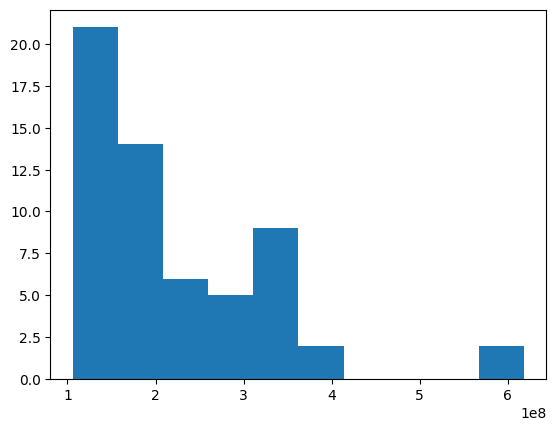

In [50]:
plt.hist(sample[sample['CRTOD_CMT_IND_0036'] >= 100000000]['CRTOD_CMT_IND_0036'])

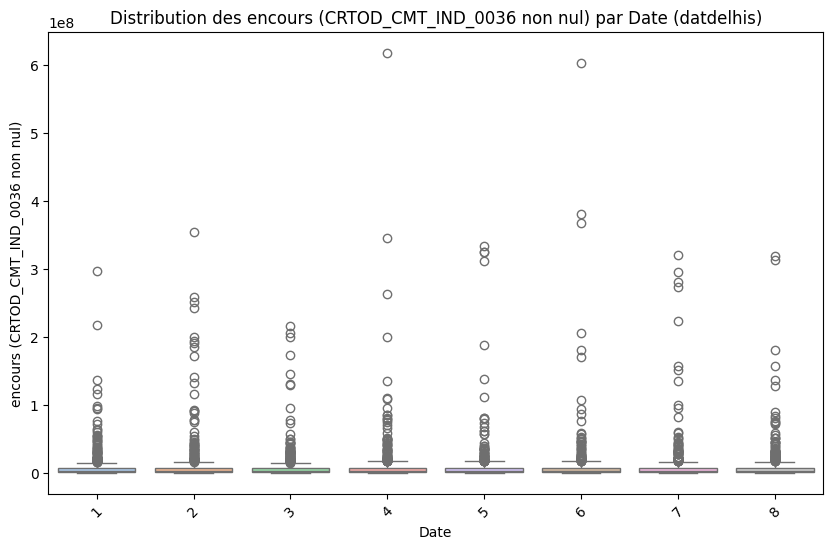

In [51]:
df = sample[sample['CRTOD_CMT_IND_0036'] != 0]
df = df.sort_values('datdelhis')

# Créer un boxplot pour visualiser la distribution de AGEPRS par date
plt.figure(figsize=(10, 6))
sns.boxplot(x='datdelhis', y='CRTOD_CMT_IND_0036', data=df, palette='pastel')

# Ajouter des titres et des labels
plt.title('Distribution des encours (CRTOD_CMT_IND_0036 non nul) par Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('encours (CRTOD_CMT_IND_0036 non nul)')
plt.xticks(rotation=45)  # Incliner les étiquettes des dates si nécessaire
plt.show()

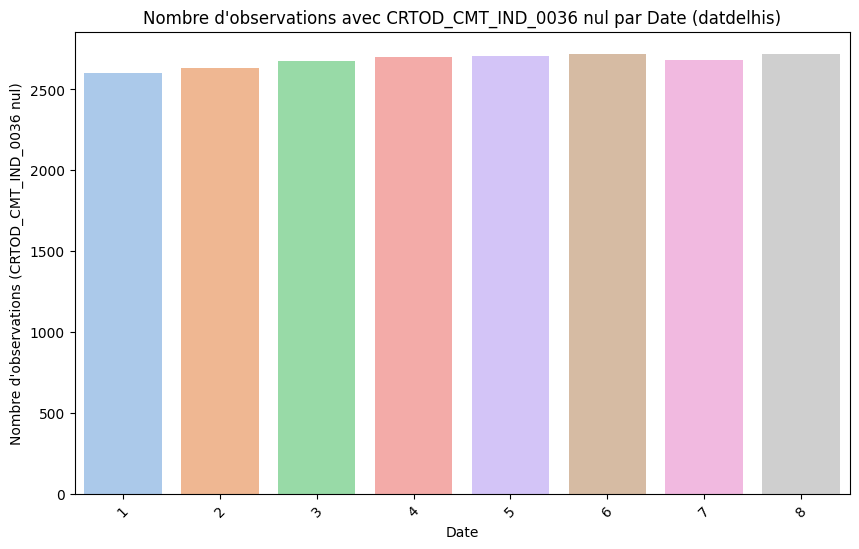

In [52]:
# Filtrer les âges égaux à 0
df = sample[sample['CRTOD_CMT_IND_0036'] == 0]
df = df.sort_values('datdelhis')

# Compter le nombre d'observations par date
observations_par_date = df.groupby('datdelhis').size().reset_index(name='Nombre d\'observations')

# Créer un graphique à barres pour le nombre d'observations par date
plt.figure(figsize=(10, 6))
sns.barplot(x='datdelhis', y='Nombre d\'observations', data=observations_par_date, palette='pastel')

# Ajouter des titres et des labels
plt.title('Nombre d\'observations avec CRTOD_CMT_IND_0036 nul par Date (datdelhis)')
plt.xlabel('Date')
plt.ylabel('Nombre d\'observations (CRTOD_CMT_IND_0036 nul)')
plt.xticks(rotation=45)  # Incliner les étiquettes des dates pour plus de lisibilité
plt.show()

# DATCREPRSENT

In [53]:
# Calculer l'ancienneté en années par rapport à la date actuelle
today = pd.to_datetime('today')
sample['DATCREPRSENT'] = ((today - sample['DATCREPRSENT']).dt.days / 30.44).round()

# Afficher des statistiques descriptives sur la nouvelle colonne 'anciennete'
print(sample['DATCREPRSENT'].describe())


count    19476.000000
mean       146.035069
std        126.097255
min         15.000000
25%         59.000000
50%        107.000000
75%        193.000000
max       1498.000000
Name: DATCREPRSENT, dtype: float64


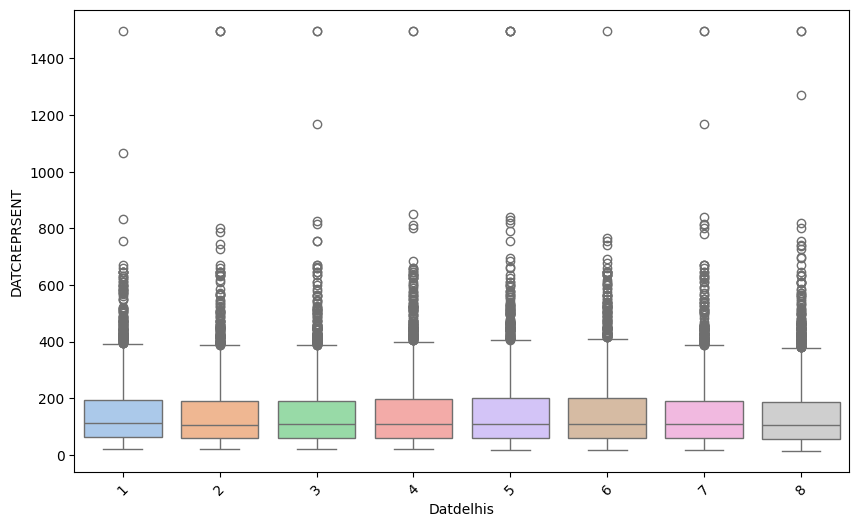

In [56]:

a = sample.dropna(subset=['DATCREPRSENT', 'datdelhis'])
df = a[a['DATCREPRSENT'].notna()]
df = df.sort_values('datdelhis')

# Créer un boxplot pour visualiser la distribution de DATCREPRSENT par datdelhis
plt.figure(figsize=(10, 6))
sns.boxplot(x='datdelhis', y='DATCREPRSENT', data=df, palette='pastel')

# Ajouter des titres et des labels
plt.xlabel('Datdelhis')
plt.ylabel('DATCREPRSENT')
plt.xticks(rotation=45)  # Incliner les étiquettes des axes X si nécessaire

# Afficher le graphique
plt.show()


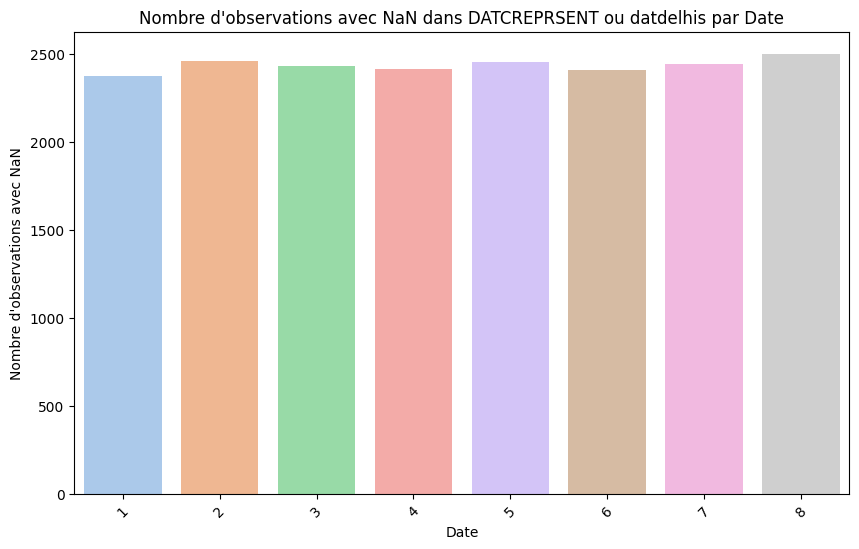

In [55]:
observations_par_date_na = a.groupby('datdelhis').size().reset_index(name='Nombre d\'observations avec NA')

# Créer un graphique à barres pour le nombre d'observations avec des NaN par date
plt.figure(figsize=(10, 6))
sns.barplot(x='datdelhis', y='Nombre d\'observations avec NA', data=observations_par_date_na, palette='pastel')

# Ajouter des titres et des labels
plt.title('Nombre d\'observations avec NaN dans DATCREPRSENT ou datdelhis par Date')
plt.xlabel('Date')
plt.ylabel('Nombre d\'observations avec NaN')
plt.xticks(rotation=45)  # Incliner les étiquettes des dates pour plus de lisibilité
plt.show()